# Audio Theory

In [1]:
import skimage
import sklearn
import numpy as np
import pandas as pd
from skimage import io
from pathlib import Path
import IPython.display as ipd
import librosa, librosa.display
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import utils as utl

pd.set_option('display.max_columns', None)

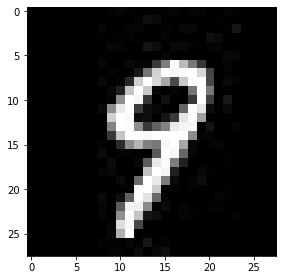

In [2]:
digit = skimage.io.imread('imgs/image_423.jpg')
skimage.io.imshow(digit)
plt.show()

In [3]:
digit.shape

(28, 28)

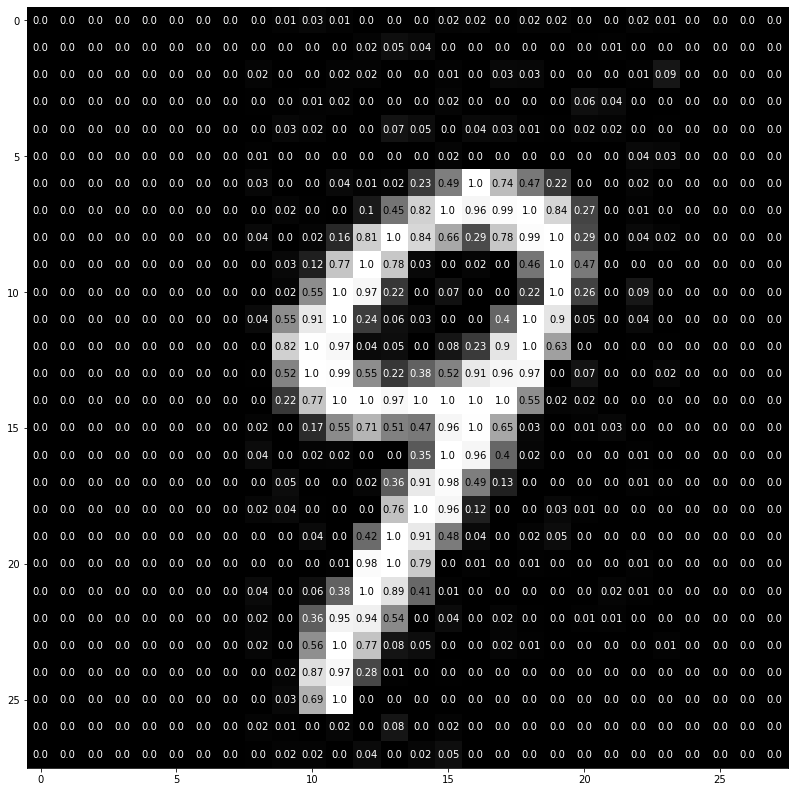

In [4]:
normalized = digit/255
fig = plt.figure(figsize = (14,14)) 
ax = fig.add_subplot(111)
utl.visualize_input(normalized, ax)

# Fundamentos do processamento de áudio digitail

Um arquivo de áudio é uma representação de um sinal sonoro. O som por sua vez, é o resultado de uma onda mecânica que é transmitida por um meio de propagação, como o ar ou a água. Sendo um pouco mais detalhista, o som é o resultado direto de uma determinada vibração que provoca zonas de maior e menor compressão, originando uma onda. Com esta definição, podemos afirmar que o silêncio é a ausência de qualquer som. Ao falar dos sons, estamos falando de um sinal analógico e, portanto, se faz necessário a conversão do mesmo para um sinal digital. Isto é necessário para este sinal possa ser processado computacionalmente, e este é o domínio do processamento de sinais. O processamento de sinais nos auxilia no processo de transformação de um sinal analógico contínuo em um sinal discreto, que por sua vez se torna um sinal digital. Para garantir que ambos os tipos de processamento produzam resultados satisfatórios, deve-se recorrer a uma fundamentação matemática que descreva como a informação carregada pelos sinais envolvidos é afetada em cada etapa do processo.

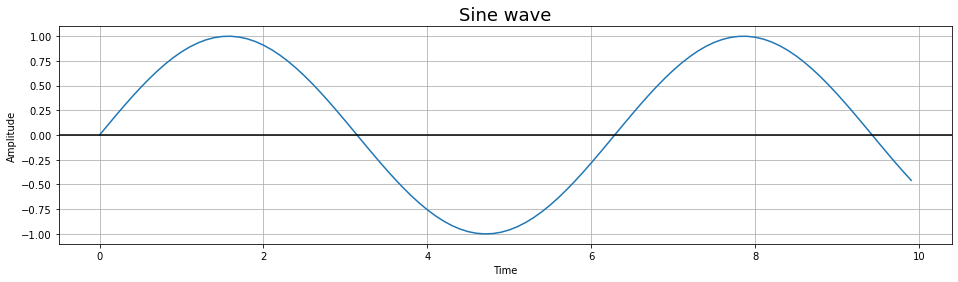

In [5]:
time = np.arange(0, 10, 0.1)
amplitude   = np.sin(time)
plt.figure(figsize=(16,4))
plt.plot(time, amplitude)
plt.title('Sine wave', fontsize=18)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

# Propriedades do Som

Podemos definir que uma onda sonora é o movimento das partículas causado por uma perturbação que se propaga através de um meio. Uma onda sonora também é uma onda longitudinal que consiste na alternância regular de pressão variando conforme a densidade, o que efetivamente propaga as flutuações em um ciclo finito. O deslocamento das partículas altera a densidade, que gera mudanças de pressão produzindo novos deslocamentos de partículas. Em relação a velocidade ($\large \vec{v}$), essa grandeza é baseada no meio de propagação utilizado. A velocidade das ondas sonoras tende a ser maior nos sólidos visto que estes elementos possuem maior proximidade de suas partículas. Outro fator é a temperatura do meio de propagação. A temperatura é uma grandeza que mede o nível de agitaçãodas  partículas  do  meio. Quanto  maior a temperatura  do  meio, maior a velocidade de propagação do som. Podemos considerar três propriedades fundamentais do som:

* Altura
* Intensidade
* Timbre.


## Altura

A **altura** define o aspecto do áudio que comumente chamamos de grave e agudo. Essa classificação é relacionada ao número de vibrações por segundo em uma onda sonora. Os sons com maior comprimento de onda tendem a ser mais baixos, e são intitulados como graves. Já os sons agudos possuem um menor comprimento de onda, gerando uma maior frequência.

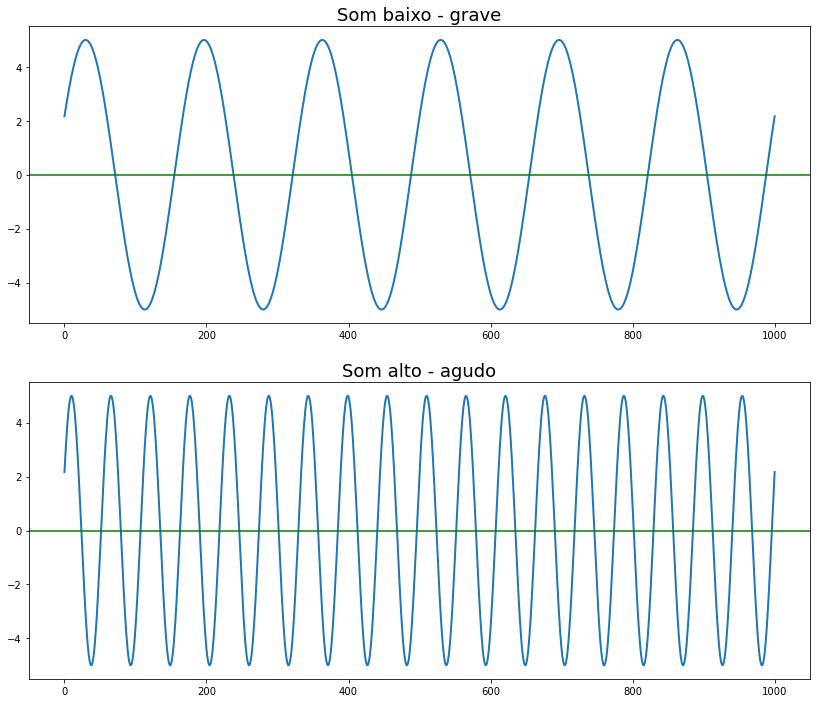

In [6]:
fa_3_5 = utl.plot_wav_freq_amp(3,5)
fa_9_5 = utl.plot_wav_freq_amp(9,5)

plt.figure(figsize=(14,12))
plt.subplot(211)
plt.plot(fa_3_5, linewidth=2)
plt.title("Som baixo - grave", fontsize=18)
plt.axhline(y=0, color='green')

plt.subplot(212)
plt.plot(fa_9_5, linewidth=2)
plt.title("Som alto - agudo", fontsize=18)
plt.axhline(y=0, color='green')

plt.show()

## Intensidade

A **intensidade** diz respeito a amplitude do sinal. Um sinal considerado forte possui uma maior amplitude. Os sons fortes transportam uma maior quantidade de energia em relação aos sons fracos. Uma onda sonora perde intensidade devido a resistência oferecida pelas partículas durante sua propagação.

O nível sonoro determina a intensidade de um som, e poodemos medir o nível sonoro em decibéis ($\large dB$), sendo que $\large 1 dB$ é o nível mais baixo detectado pela audição humana, e $\large 120 dB$ é o nível máximo suportado por nossa audição.

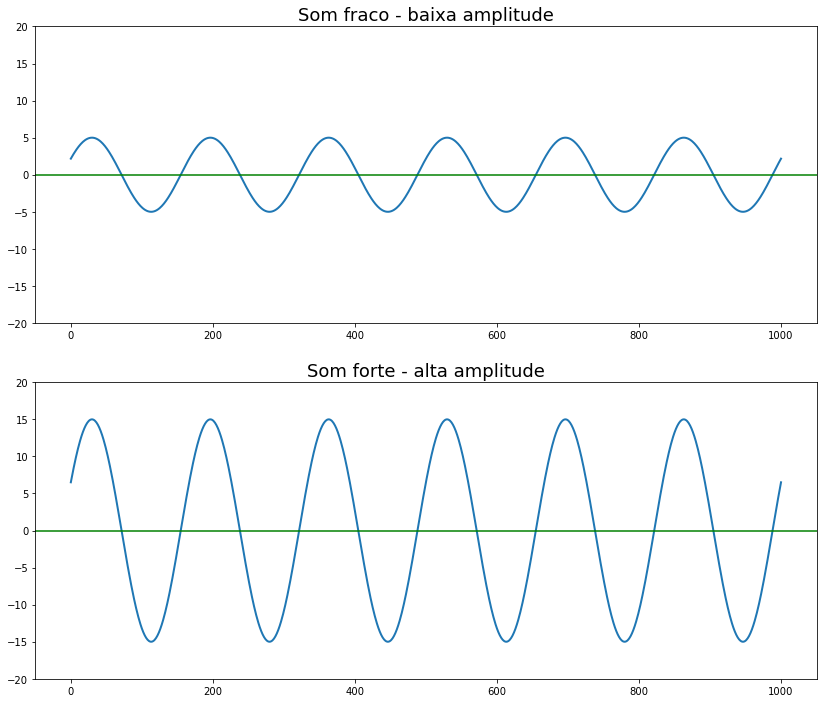

In [7]:
fa_3_5 = utl.plot_wav_freq_amp(3,5)
fa_3_15 = utl.plot_wav_freq_amp(3,15)

plt.figure(figsize=(14,12))
plt.subplot(211)
plt.plot(fa_3_5, linewidth=2)
plt.title("Som fraco - baixa amplitude", fontsize=18)
plt.axhline(y=0, color='green')
plt.ylim(-20, 20)

plt.subplot(212)
plt.plot(fa_3_15, linewidth=2)
plt.title("Som forte - alta amplitude", fontsize=18)
plt.axhline(y=0, color='green')
plt.ylim(-20, 20)

#plt.savefig('amplitude.png')
plt.show()

## Timbre

Por último temos o **timbre**.  Esta propriedade do som que nos permite distinguiruma fonte sonora de outra, mesmo que estajam em uma mesma frequência. Otimbre de uma fonte sonora é representado por uma onda complexa, que é a soma de umaonda fundamental (som puro, ou simples) e sons harmônicos.  Cada fonte sonora produzuma onda sonora complexa diferente, isso nos permite identificar que o som produzidopor um violino é diferente de um som produzido por um oboé.

In [8]:
x_1, sr_1 = librosa.load('audios/piano-C4.wav')
r_1 = librosa.autocorrelate(x_1, max_size=5000)

x_2, sr_2 = librosa.load('audios/violin-C4.wav')
r_2 = librosa.autocorrelate(x_2, max_size=5000)

x_3, sr_3 = librosa.load('audios/trumpet-C4.wav')
r_3 = librosa.autocorrelate(x_3, max_size=5000)

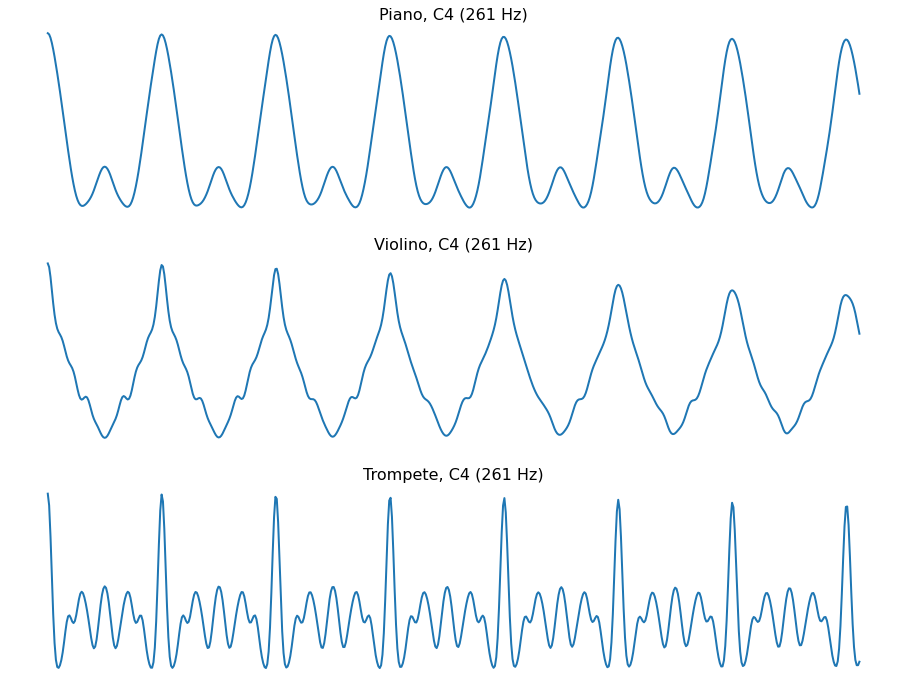

In [9]:
plt.figure(figsize=(16,12))
plt.subplot(311)
plt.plot(r_1[:600], linewidth=2)
plt.title("Piano, C4 (261 Hz)", fontsize=16)
plt.axis('off')

plt.subplot(312)
plt.plot(r_2[:600], linewidth=2)
plt.title("Violino, C4 (261 Hz)", fontsize=16)
plt.axis('off')

plt.subplot(313)
plt.plot(r_3[:600], linewidth=2)
plt.title("Trompete, C4 (261 Hz)", fontsize=16)
plt.axis('off')

plt.show()

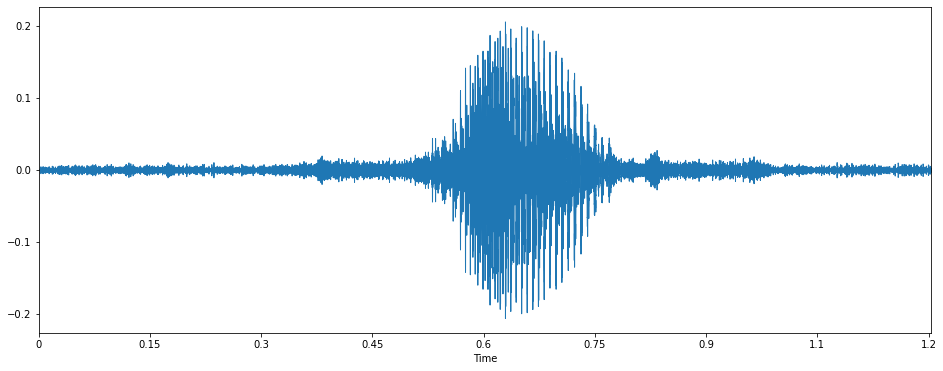

In [10]:
x, sr = librosa.load('audios/seis.wav')

plt.figure(figsize=(16, 6))
librosa.display.waveplot(x, sr=sr)
plt.show()

In [11]:
sr

22050

In [12]:
ipd.Audio('audios/seis.wav')

In [13]:
len(x)

26546

In [14]:
print(x[:10])

[ 3.3053184e-06 -2.9897710e-06 -6.6047673e-06 -3.5277192e-06
  3.4473683e-06  7.4087156e-06  4.3747696e-06 -2.8349530e-06
 -8.1784683e-06 -9.5208979e-06]


In [15]:
sample_rate = 8000 # amostras por segundo
T = 5.0 # segundos
t = np.linspace(0, T, int(T*sample_rate), endpoint=False) # time variable

In [16]:
x = 0.5 * np.sin(2 * np.pi * 440 * t) #uma onda senoidal pura de 440 Hz (ISO 16!)
#np.linspace(0, T, int(T*sample_rate), endpoint=False) # time variable
ipd.Audio(x, rate=sample_rate) # Carrega a onda de 440Hz

In [17]:
y = 0.5*np.sin(2*np.pi*1000*t) #uma onda senoidal pura de 1000 Hz
ipd.Audio(y, rate=sample_rate) # Carrega a onda de 1000Hz

In [18]:
xy = x + y
ipd.Audio(xy, rate=sample_rate) # carrega o som de x + y

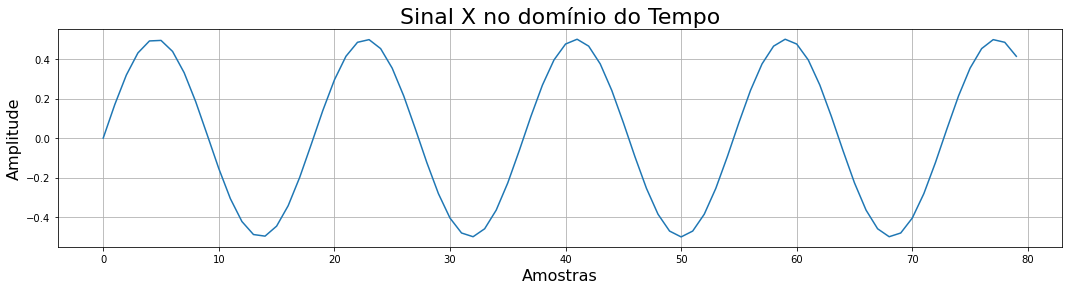

In [19]:
plt.figure(figsize=(18, 4))
plt.plot(x[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal X no domínio do Tempo', fontsize = 22)
plt.grid(True)
plt.show()

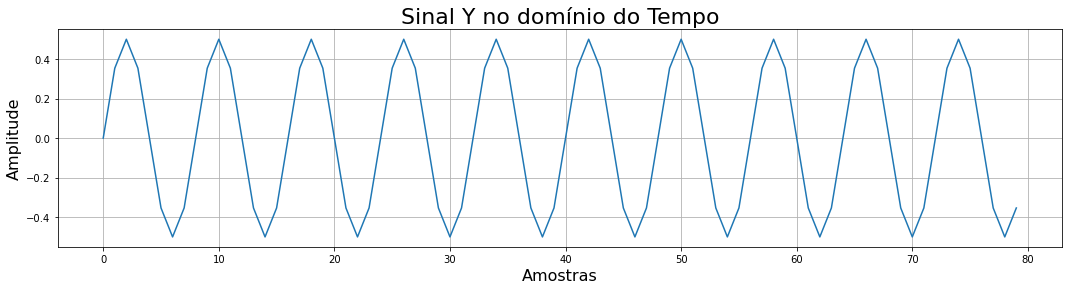

In [20]:
plt.figure(figsize=(18, 4))
plt.plot(y[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal Y no domínio do Tempo', fontsize = 22)
plt.grid(True)
plt.show()

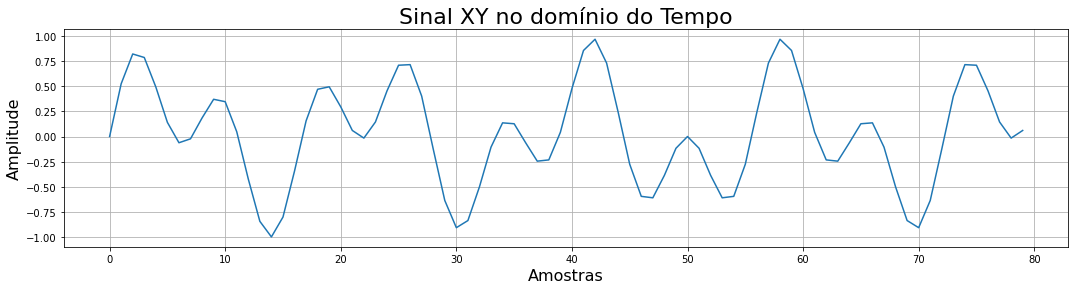

In [21]:
plt.figure(figsize=(18, 4))
plt.plot(xy[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal XY no domínio do Tempo', fontsize = 22)
plt.grid(True)
plt.show()

In [22]:
t_n = 10; N = 1000; T = t_n / N; f_s = 1/T

x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = utl.get_fft_values(composite_y_value, T, N, f_s)

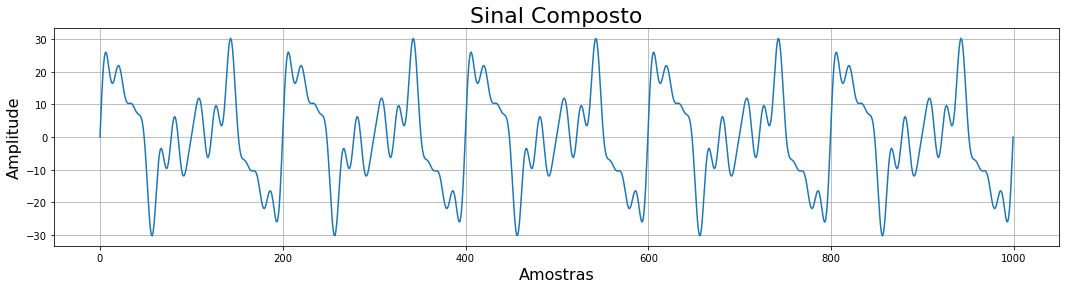

In [23]:
plt.figure(figsize=(18, 4))
plt.plot(composite_y_value)
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal Composto', fontsize = 22)
plt.grid(True)
plt.show()

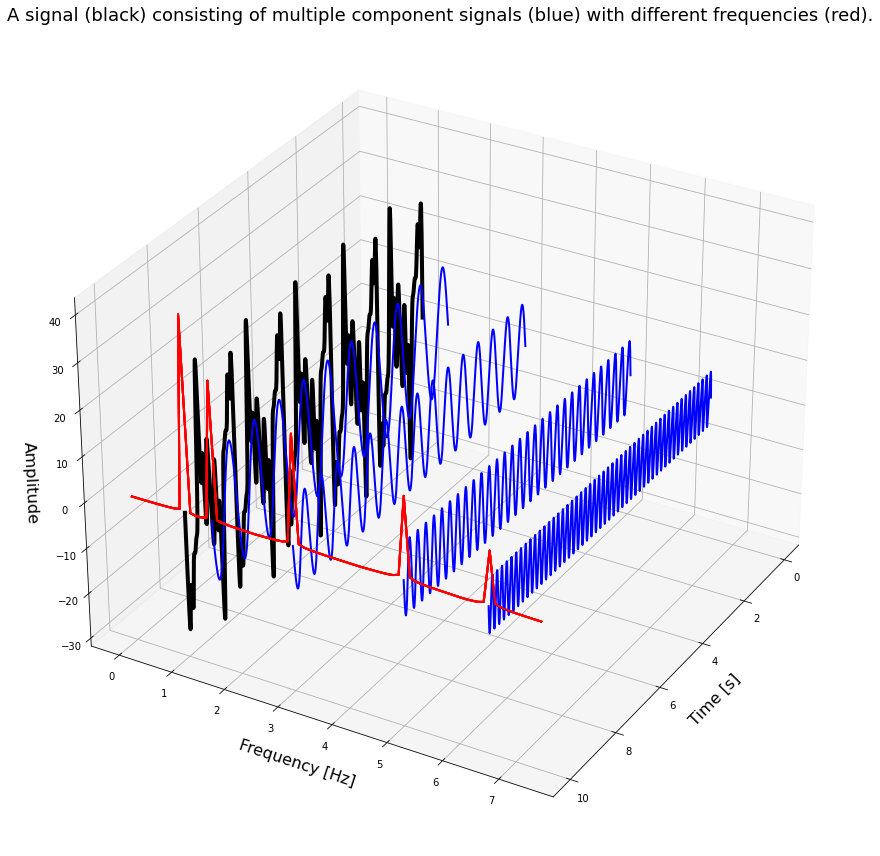

In [47]:
utl.composite_view(composite_y_value, y_values, f_values, fft_values, 30,30)

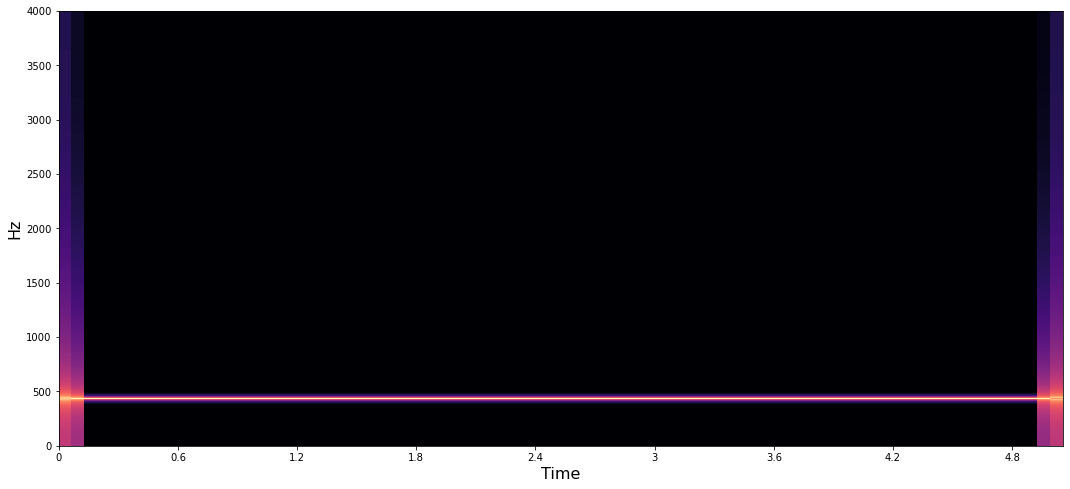

In [25]:
utl.plot_specshow(x, sample_rate)

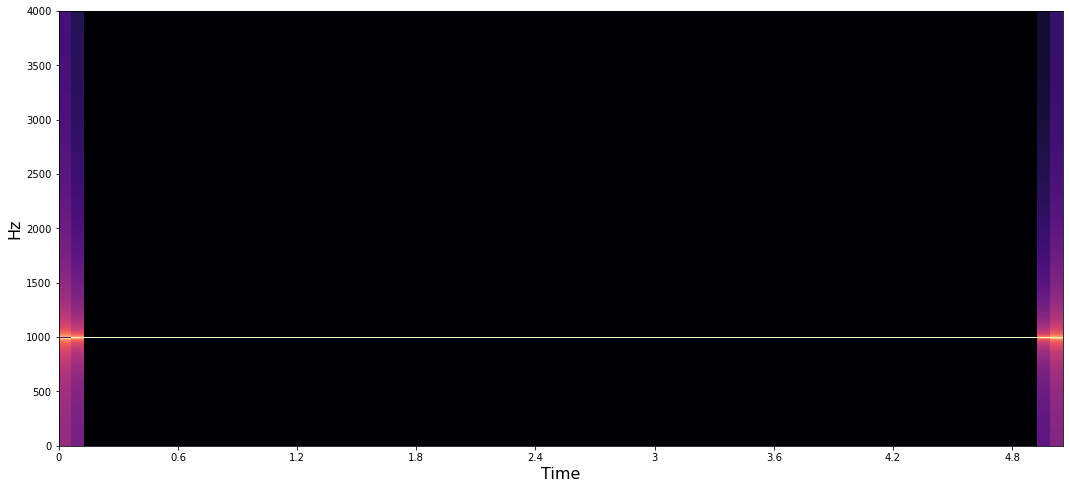

In [26]:
utl.plot_specshow(y, sample_rate)

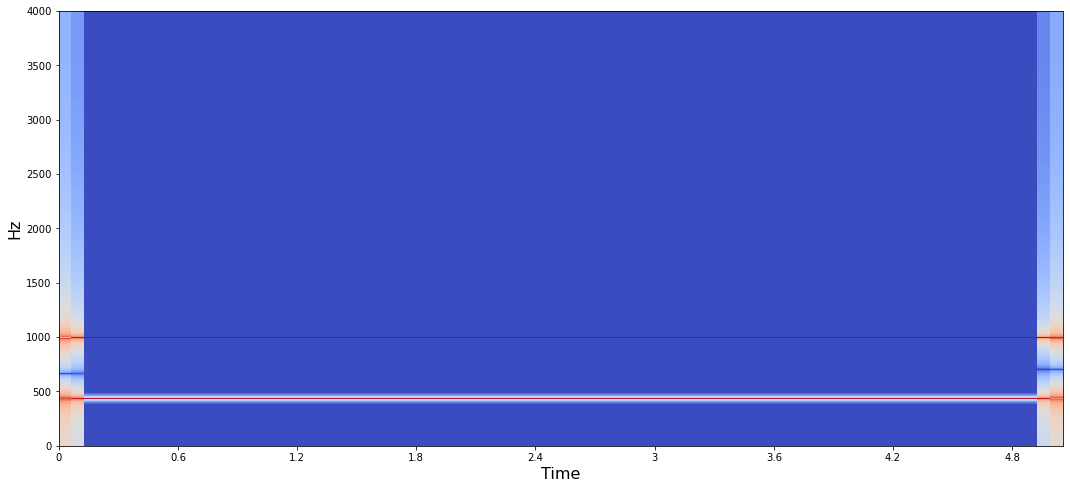

In [27]:
utl.plot_specshow(xy, sample_rate)

In [28]:
sinal_audio, sample_rate_sinal_audio = librosa.load('audios/OSR_us_000_0010_8k.wav', sr=None)

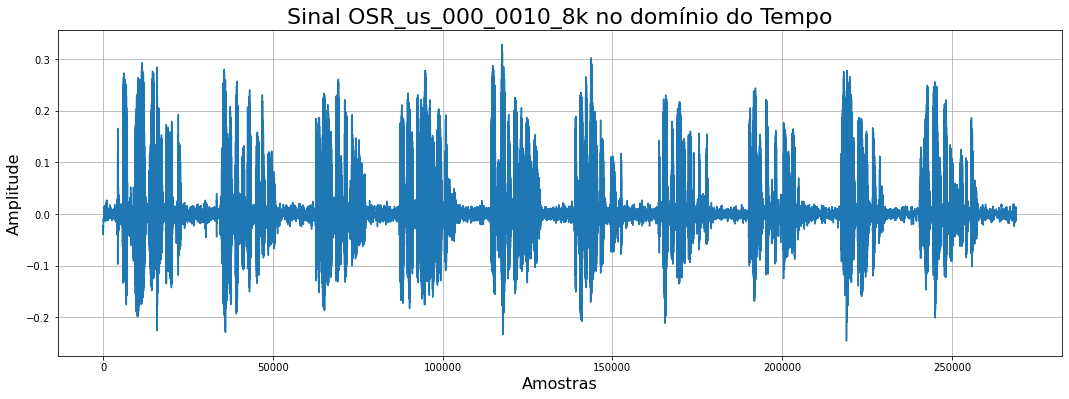

In [29]:
plt.figure(figsize=(18, 6))
plt.plot(sinal_audio)
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal OSR_us_000_0010_8k no domínio do Tempo', fontsize = 22)
plt.grid(True)
plt.show()

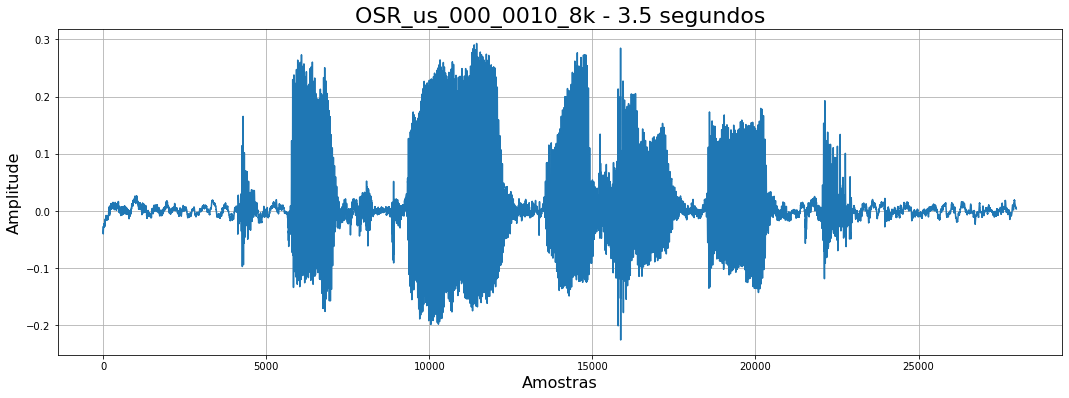

In [30]:
plt.figure(figsize=(18, 6))
plt.plot(sinal_audio[:int(3.5*sample_rate_sinal_audio)]) # 3.5 segundos do áudio
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('OSR_us_000_0010_8k - 3.5 segundos', fontsize = 22)
plt.grid(True)
plt.show()

In [31]:
ipd.Audio(sinal_audio, rate=sample_rate_sinal_audio) # carrega o som do openspeech

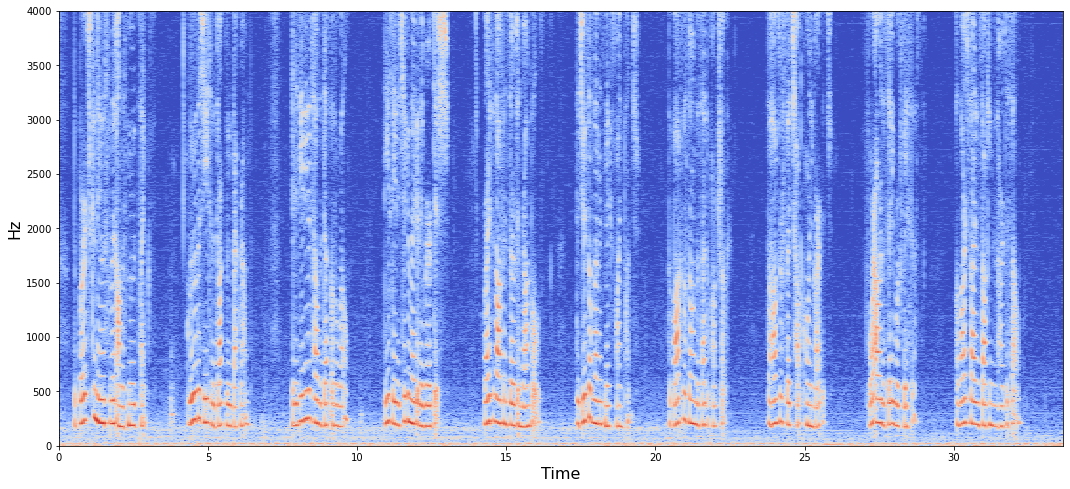

In [32]:
plt.figure(figsize=(18, 8))

SINAL_AUDIO = librosa.stft(sinal_audio)
SINAL_AUDIOdb = librosa.amplitude_to_db(np.abs(SINAL_AUDIO))
librosa.display.specshow(SINAL_AUDIOdb, sr=sample_rate_sinal_audio, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

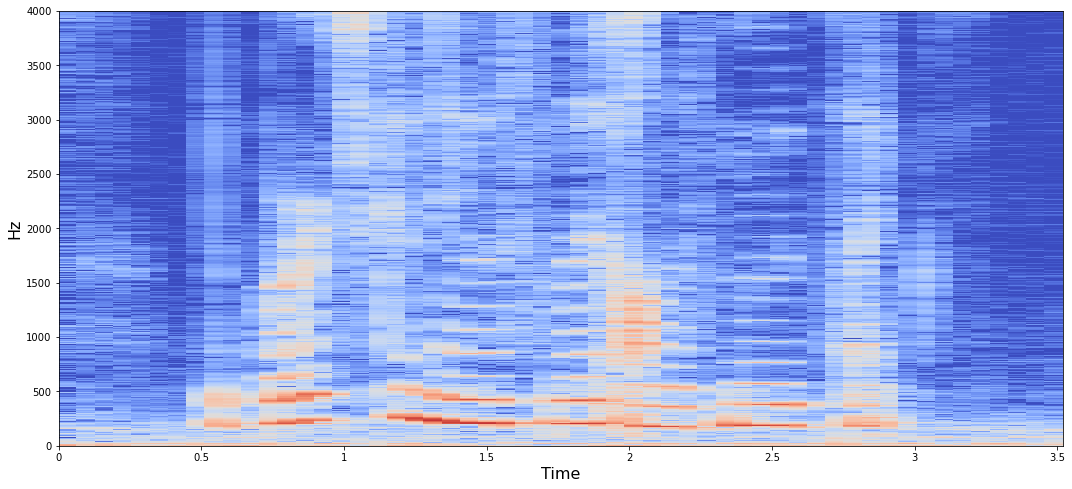

In [33]:
plt.figure(figsize=(18, 8))

SINAL_AUDIO = librosa.stft(sinal_audio[0:int(3.5 * sample_rate)])
SINAL_AUDIOdb = librosa.amplitude_to_db(np.abs(SINAL_AUDIO))
librosa.display.specshow(SINAL_AUDIOdb, sr=sample_rate_sinal_audio, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

In [34]:
kick_signals = [ librosa.load(p)[0] for p in Path().glob('audios/drum_samples/train/kick_*.mp3') ]
snare_signals = [ librosa.load(p)[0] for p in Path().glob('audios/drum_samples/train/snare_*.mp3') ]

print(len(kick_signals))
print(len(snare_signals))

10
10


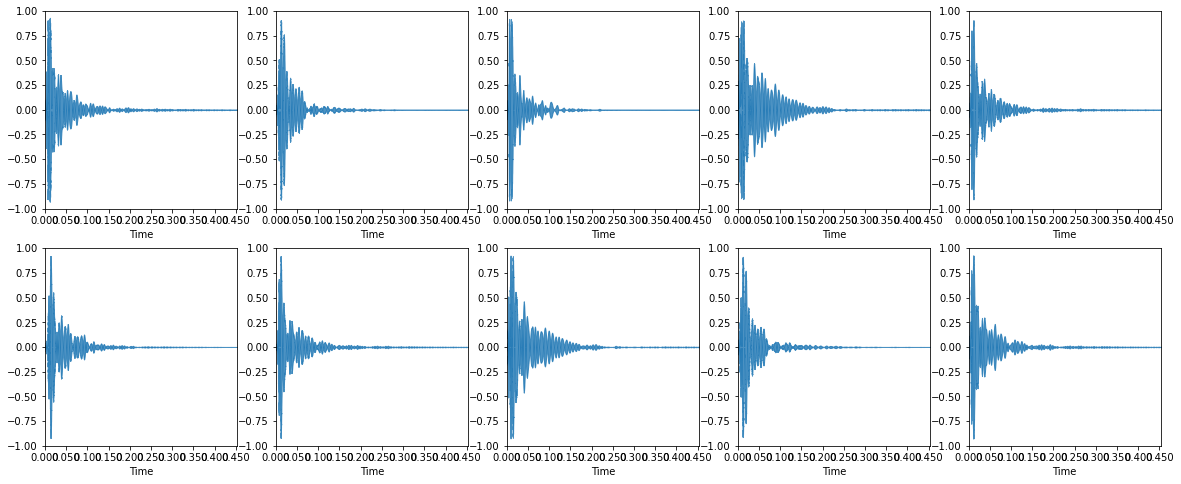

In [35]:
plt.figure(figsize=(20, 8))

for i, x in enumerate(kick_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000], alpha=0.8)
    plt.ylim(-1, 1)

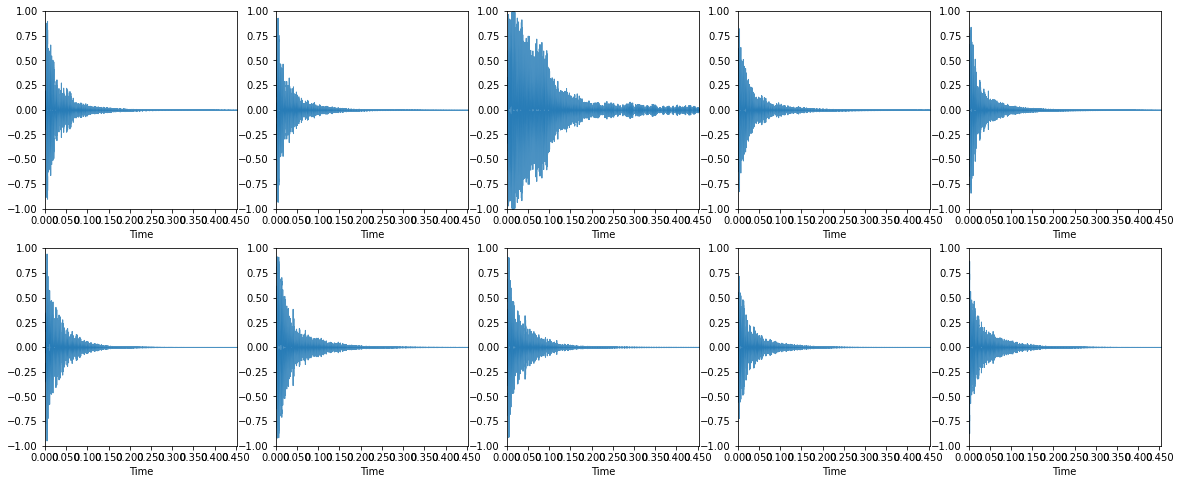

In [36]:
plt.figure(figsize=(20, 8))

for i, x in enumerate(snare_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000], alpha=0.8)
    plt.ylim(-1, 1)

In [37]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0]
    ]

In [38]:
kick_features = np.array([extract_features(x) for x in kick_signals])
snare_features = np.array([extract_features(x) for x in snare_signals])

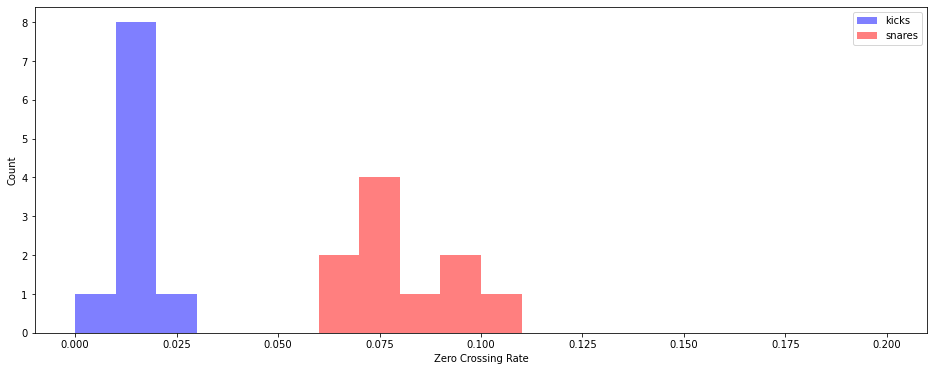

In [39]:
plt.figure(figsize=(16, 6))

plt.hist(kick_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(snare_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('kicks', 'snares'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')
plt.show()

In [40]:
feature_table = np.vstack((kick_features, snare_features))
print(feature_table.shape)

scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)

print(training_features.min(axis=0))
print(training_features.max(axis=0))

(20, 2)
[-1. -1.]
[1. 1.]


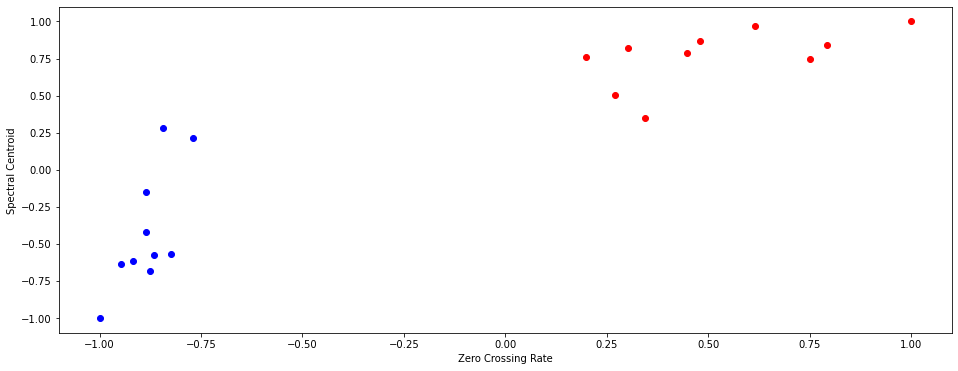

In [41]:
plt.figure(figsize=(16, 6))
plt.scatter(training_features[:10,0], training_features[:10,1], c='b')
plt.scatter(training_features[10:,0], training_features[10:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')
plt.show()